In [19]:
#https://wtrust.com.br/
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

[Baixar base do yahoo](http://127.0.0.1:8888/notebooks/trades/pairs_trading_b3/utils/Historic-Yahoo.ipynb)

In [20]:
def plot_pairs(pairs, data, period_ext=None):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        if (period_ext == None):
            period = row['Period']
        else:
            period=period_ext
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [21]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [22]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-01-02 to 2020-08-05
data: (395, 74)
pairs: (2038, 13)


In [23]:
#data.to_excel('datasets/data_cart.xlsx')

In [24]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,AZUL4,-4.799838,99,0.156582,1.850609,2,0.664947,0.920666,Long/Short,2,"100,120"
1,100,ABEV3,B3SA3,-4.253103,99,0.123970,2.114890,2,0.632871,1.052144,Long/Short,2,"100,120"
2,100,ABEV3,BBAS3,-4.792813,99,0.190044,1.873775,2,0.665985,0.932191,Long/Short,7,"100,120,140,160,180,240,250"
3,100,ABEV3,BBDC3,-5.416787,99,0.337596,2.596668,2,0.672652,1.291826,Long/Short,6,"100,120,140,160,180,200"
4,100,ABEV3,BBDC4,-5.870216,99,0.295106,2.597613,2,0.684275,1.292296,Long/Short,7,"100,120,140,160,180,200,240"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,100,VALE3,VIVT4,-5.335696,99,0.000826,1.208421,2,0.366651,0.601182,Long/Short,3,"100,120,140"
2034,100,VALE3,VVAR3,-5.395999,99,0.187696,1.234186,2,0.426027,0.614000,Long/Short,6,"100,120,140,220,240,250"
2035,100,VALE3,WEGE3,-4.120633,99,-0.100860,0.871348,1,0.378856,0.433490,Long/Short,1,100
2036,100,VIVT4,VVAR3,-3.849642,99,0.520319,1.106547,3,0.376605,0.550500,Short/Long,7,"100,120,140,160,180,200,220"


In [25]:
"""
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal"""

pairs_signal = pairs.loc[
    (pairs['Std'] >= 2) \
    & (pairs['Std'] <= 2.5) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,BBSE3,-4.241392,99,0.314616,2.044573,2,0.523838,1.017162,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,0.641191,1.146828,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,100,CIEL3,ITUB4,-4.441627,99,0.313495,2.119107,2,0.631480,1.054242,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,100,ABEV3,CSNA3,-3.741844,99,0.498549,2.101826,3,0.574302,1.045645,Long/Short,9,"100,120,140,160,180,200,220,240,250"
4,100,BRML3,EGIE3,-3.957846,99,0.279523,2.418778,3,0.608867,1.203327,Long/Short,9,"100,120,140,160,180,200,220,240,250"
5,100,BRML3,FLRY3,-3.943530,99,0.464655,2.092181,3,0.741163,1.040847,Long/Short,9,"100,120,140,160,180,200,220,240,250"
6,100,CSAN3,ECOR3,-3.527772,99,1.277814,2.018217,3,0.785605,1.004050,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,100,CSAN3,IGTA3,-3.842831,99,0.584691,2.484403,3,0.720509,1.235975,Short/Long,9,"100,120,140,160,180,200,220,240,250"
8,100,CSAN3,LREN3,-3.732283,99,0.380186,2.118991,3,0.678138,1.054185,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,100,CSAN3,SBSP3,-3.778769,99,0.251945,2.034214,3,0.685560,1.012009,Short/Long,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [26]:
#plot_pairs(pairs_signal, data)

In [27]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [28]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [29]:
oper = pd.read_csv('datasets/operations.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,Std,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,BPAC11,-4.891320,99,0.070160,2.305211,2,0.641191,1.146828,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,100,CIEL3,ITUB4,-4.441627,99,0.313495,2.119107,2,0.631480,1.054242,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,BRKM5,LAME4,-4.066723,99,1.197584,0.000000,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"


In [30]:
"""oper.drop([0,1], inplace=True)
new = pairs_signal.iloc[[1,2]].copy()

oper = pd.concat([new, oper])
oper.reset_index(drop=True, inplace=True)
oper.to_csv('datasets/operations.csv', index=False)
oper"""

"oper.drop([0,1], inplace=True)\nnew = pairs_signal.iloc[[1,2]].copy()\n\noper = pd.concat([new, oper])\noper.reset_index(drop=True, inplace=True)\noper.to_csv('datasets/operations.csv', index=False)\noper"

In [31]:
#oper.to_csv('datasets/operations.csv', index=False)

In [41]:
#mult.residue(data['CMIG4'], data['ENGI11'], 250)


In [45]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    check = mult.check_cointegration(data[y_symbol], data[x_symbol], period)
    print('{}/{}, {}, {}'.format(y_symbol, x_symbol, period, check['is_stationary']))

ABEV3/BPAC11, 100, True
CIEL3/ITUB4, 100, True
BRKM5/LAME4, 250, True


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


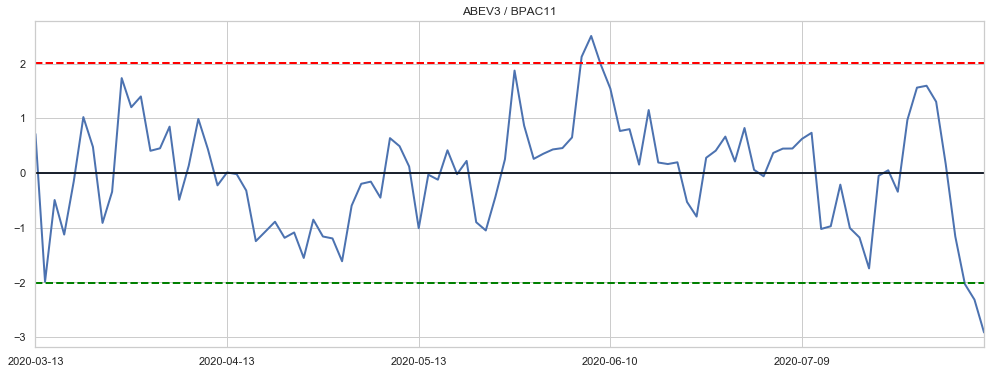

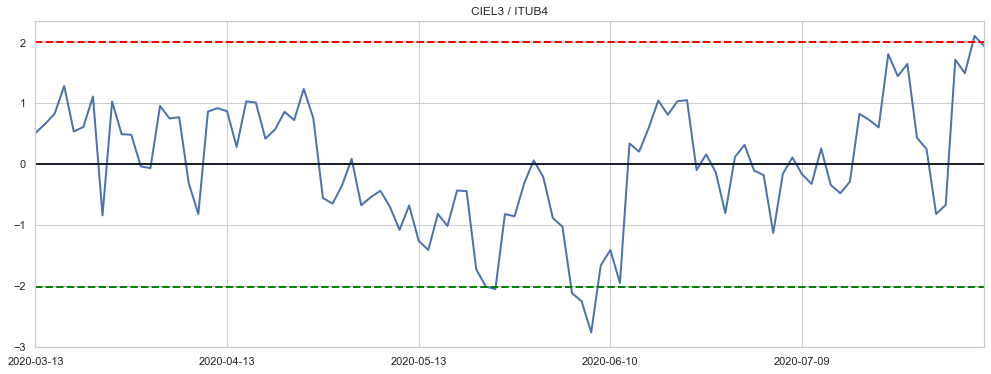

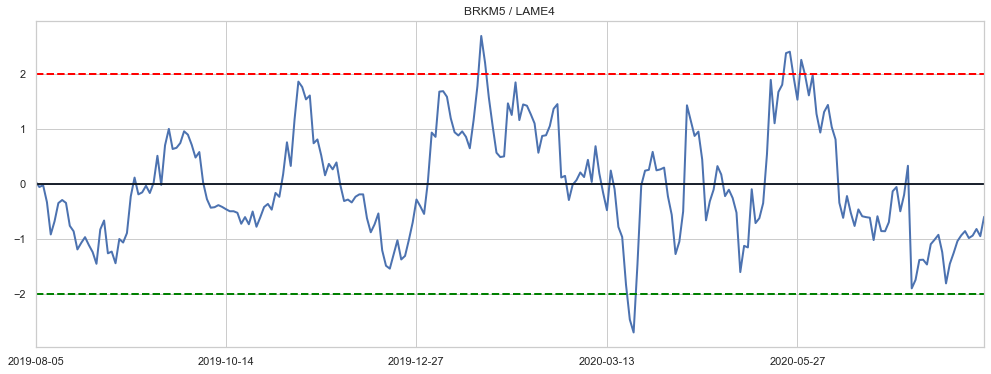

In [33]:
plot_pairs(oper, data)

In [34]:
#df.to_excel('datasets/data_cart.xlsx')

In [35]:
for i, row in oper.iterrows():
    y_symbol = row['Dependent']
    x_symbol = row['Independent']
    period = row['Period']
    mult.summary(data, y_symbol, x_symbol, period)

Período de Análise                   100   Entrada      Compra:ABEV3 / Venda:BPAC11
Independente                       ABEV3   Dependente                        BPAC11
R$                                 13.18   R$                                  88.2
Ratio                 0.1494331152064564   
→ CASH NEUTRAL ←
ABEV3                                100   Financeiro                        1318.0
BPAC11                          -14.9433   Financeiro                    -1317.9991
                                                                                0.0
→ BETA NEUTRAL ←
BPAC11                                -6   Financeiro R$                     -529.2
ABEV3                                100   Financeiro R$                     1318.0
                                                                              788.8
Somente para operação Beta Neutral:
Retorno  (%)           6.387669098706528   Gain                  122.05194541798515
Atual    (%)           9.260390181482425   Los